## Predicting  Diabetes

In [1]:
import pandas as pd #data frame library 
import numpy as np #data manipulation and analysis
from matplotlib import pyplot as plt #plotting dataset

### Load and review data

In [2]:
df=pd.read_csv('pima-data.csv', delimiter=',')  #load Pima data. Adjust path as necesary
df.shape

(768, 10)

In [3]:
df.head()   #to show the beginning row of our data set

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


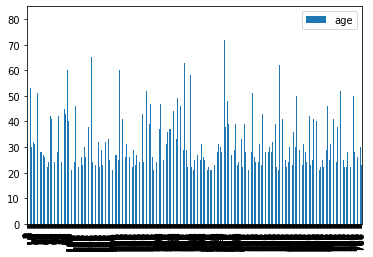

In [4]:
df.plot(y="age",kind="bar")

In [5]:
# Find missing values
print('Missing values:{}'.format(df.isnull().any().sum()))
# Find duplicated records
print('\nNumber of duplicated records: {}'.format(df.duplicated().sum()))

Missing values:0

Number of duplicated records: 0


In [6]:
df=pd.read_csv('pima-data - missing values.csv', delimiter=',')  #load Pima data. Adjust path as necesary
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,?,72,35,0,33.6,0.627,?,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [7]:
# Find missing values
print('Missing values:{}'.format(df.isnull().any().sum()))
# Find duplicated records
print('\nNumber of duplicated records: {}'.format(df.duplicated().sum()))

Missing values:0

Number of duplicated records: 0


In [8]:
print (df.astype(str) != '?')

     num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  \
0        True         False          True       True     True  True   
1        True          True          True       True     True  True   
2        True          True          True       True     True  True   
3        True          True          True       True     True  True   
4        True          True          True       True     True  True   
..        ...           ...           ...        ...      ...   ...   
763      True          True          True       True     True  True   
764      True          True          True       True     True  True   
765      True          True          True       True     True  True   
766      True          True          True       True     True  True   
767      True          True          True       True     True  True   

     diab_pred    age  skin  diabetes  
0         True  False  True      True  
1         True   True  True      True  
2         True   True  True

In [9]:
df = df.replace({'?': np.nan}).dropna()

In [10]:
print (df.astype(str) != '?')

     num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  \
1        True          True          True       True     True  True   
2        True          True          True       True     True  True   
3        True          True          True       True     True  True   
4        True          True          True       True     True  True   
5        True          True          True       True     True  True   
..        ...           ...           ...        ...      ...   ...   
763      True          True          True       True     True  True   
764      True          True          True       True     True  True   
765      True          True          True       True     True  True   
766      True          True          True       True     True  True   
767      True          True          True       True     True  True   

     diab_pred   age  skin  diabetes  
1         True  True  True      True  
2         True  True  True      True  
3         True  True  True    

#### Check Data Types

In [11]:
df['diabetes']=df['diabetes'].map({True:1,False:0})

In [12]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1
5,5,116,74,0,0,25.6,0.201,30,0.0000,0


In [13]:
df.to_csv('Cleanning diabetes dataset.csv',sep=',',index=False)

In [14]:
 #load Pima data. Adjust path as necesary
diabetes=pd.read_csv('Cleanning diabetes dataset.csv', delimiter=',') 
diabetes.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,1,85,66,29,0,26.6,0.351,31,1.1426,0
1,8,183,64,0,0,23.3,0.672,32,0.0000,1
2,1,89,66,23,94,28.1,0.167,21,0.9062,0
3,0,137,40,35,168,43.1,2.288,33,1.3790,1
4,5,116,74,0,0,25.6,0.201,30,0.0000,0


### Data Split

In [15]:
from sklearn.model_selection import train_test_split


X=df[['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age']] 
Y=df['diabetes'] 

X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.20,random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)

In [17]:
X_train

array([[ 0.06649666,  1.92987383, -3.48834088, ..., -0.47057917,
        -0.76640618,  0.23925174],
       [ 0.06649666, -0.69487691,  0.35552546, ..., -1.13518625,
        -0.7345974 , -1.04800381],
       [ 1.5541774 ,  0.0862989 ,  0.05206233, ...,  0.4240842 ,
        -0.56398668,  0.06761766],
       ...,
       [ 0.9591051 , -0.22617143, -0.25140081, ..., -0.59838823,
         0.73728155,  0.06761766],
       [ 0.66156896,  0.11754593,  0.35552546, ...,  0.21958971,
        -1.02955153,  1.78395839],
       [-0.52857564,  0.24253406,  0.25437108, ...,  0.14290428,
         0.32955084, -0.70473566]])

In [18]:
from sklearn.svm import SVC 
svm = SVC(C=4)

In [19]:
svm.fit(X_train, y_train)

SVC(C=4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test, y_test)))

The accuracy on the training subset: 0.856
The accuracy on the test subset: 0.773


In [21]:
from sklearn.externals import joblib

F:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [22]:
joblib.dump(svm,'diabetes')

['diabetes']

In [23]:
clf=joblib.load('diabetes')

In [24]:
data=clf.predict([[1,70,3,4,5,6,7,8]])
for i in range(1):
    if(data[i]==1):
        print("diabetes")     

    elif(data[i]==0):
        print("Has No Diabetes") 

Has No Diabetes


In [ ]:
import emlearn
cmodel = emlearn.convert(clf, method='inline')
cmodel.save(file='diabetes.h')import emlearn
cmodel = emlearn.convert(clf, method='inline')
cmodel.save(file='diabetes.h')